In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path_img = path/'images'

In [ ]:
contents = os.listdir(path_img)

for item in contents:
    print(item)

Streaming output truncated to the last 5000 lines.
Persian_91.jpg
leonberger_13.jpg
newfoundland_152.jpg
basset_hound_60.jpg
Siamese_6.jpg
american_pit_bull_terrier_75.jpg
Ragdoll_138.jpg
chihuahua_81.jpg
Abyssinian_25.jpg
saint_bernard_10.jpg
english_setter_112.jpg
Abyssinian_26.jpg
german_shorthaired_103.jpg
japanese_chin_161.jpg
Persian_51.jpg
english_setter_53.jpg
Siamese_185.jpg
chihuahua_184.jpg
scottish_terrier_24.jpg
japanese_chin_33.jpg
leonberger_50.jpg
samoyed_90.jpg
basset_hound_37.jpg
yorkshire_terrier_123.jpg
american_pit_bull_terrier_105.jpg
english_cocker_spaniel_14.jpg
Russian_Blue_50.jpg
British_Shorthair_204.jpg
leonberger_80.jpg
miniature_pinscher_76.jpg
Egyptian_Mau_71.jpg
chihuahua_189.jpg
havanese_103.jpg
Russian_Blue_203.jpg
pomeranian_132.jpg
english_setter_52.jpg
scottish_terrier_78.jpg
Maine_Coon_110.jpg
american_bulldog_196.jpg
yorkshire_terrier_10.jpg
Russian_Blue_195.jpg
Russian_Blue_242.jpg
american_pit_bull_terrier_192.jpg
basset_hound_90.jpg
great_pyren

In [ ]:
def is_cat(x): return x[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(
              path,
              get_image_files(path),
              valid_pct=0.2, seed=42,
              label_func=is_cat,
              item_tfms=Resize(224)
              )

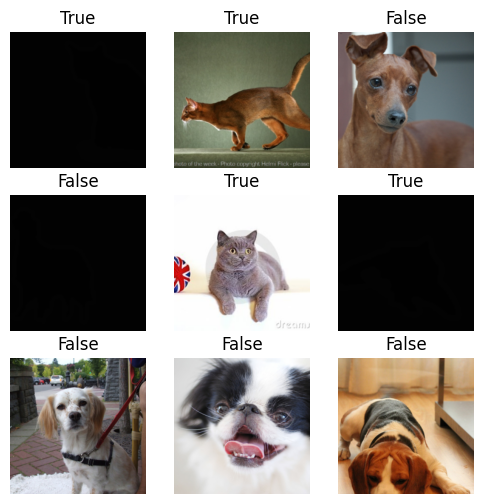

In [ ]:
dls.show_batch(max_n=9, figsize=(6, 6))

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.395027,0.266470,0.118403,02:25


epoch,train_loss,valid_loss,error_rate,time
0,0.227250,0.184104,0.084235,03:27


In [ ]:
learn.save('pet_model')

Path('/root/.fastai/data/oxford-iiit-pet/models/pet_model.pth')

In [ ]:
from google.colab import files

model_path = '/root/.fastai/data/oxford-iiit-pet/models/pet_model.pth'

files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

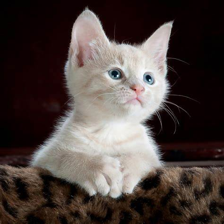

In [ ]:
img = PILImage.create(uploader.data[0])
img.resize((224, 224))

In [ ]:
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [ ]:
def primary_label_func(fname):
    return 'cat' if fname.name[0].isupper() else 'dog'

In [ ]:
def breed_label_func(fname):
    return '_'.join(fname.stem.split('_')[:-1])

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=primary_label_func,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(128),
    # batch_tfms=aug_transforms(mult=2)
)

In [ ]:
dls = dblock.dataloaders(path, bs=32)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 105MB/s]


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.449320,0.298620,0.858254,00:51


epoch,train_loss,valid_loss,accuracy,time
0,0.342483,0.243184,0.893775,01:10
1,0.260320,0.222415,0.901556,01:09
2,0.207929,0.194870,0.912720,01:10
3,0.178261,0.188102,0.921177,01:10


In [ ]:
import ipywidgets as widgets

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

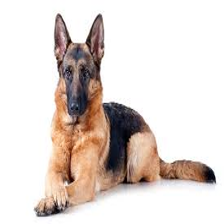

In [ ]:
img = PILImage.create(uploader.data[0])
img.resize((224, 224))

In [ ]:
learn.predict(img)

('dog', tensor(1), tensor([0.0141, 0.9859]))

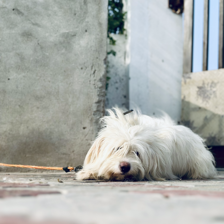

In [ ]:
img = PILImage.create(uploader.data[0])
img.resize((224, 224))

In [ ]:
learn.predict(img)

('dog', tensor(1), tensor([0.1128, 0.8872]))

In [ ]:
learn.save('cat_dog_model')

Path('models/cat_dog_model.pth')

In [ ]:
from google.colab import files

model_path = 'models/cat_dog_model.pth'

files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Breeds**

In [ ]:
dblock_breed = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=breed_label_func,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(128),
)

In [ ]:
dls_breed = dblock_breed.dataloaders(path, bs=32)

In [ ]:
learn_breed = vision_learner(dls_breed, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 77.3MB/s]


In [ ]:
learn_breed.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.936444,2.266481,0.385656,01:13


epoch,train_loss,valid_loss,accuracy,time
0,2.288524,1.887646,0.448579,01:10
1,2.042817,1.804572,0.475981,01:09
2,1.758995,1.617085,0.520298,01:11
3,1.514320,1.590241,0.521989,01:11


In [ ]:
import ipywidgets as widgets

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

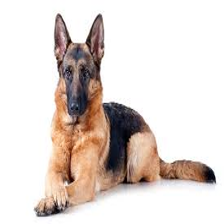

In [ ]:
img = PILImage.create(uploader.data[0])
img.resize((224, 224))

In [ ]:
learn_breed.predict(img)

('miniature_pinscher',
 tensor(26),
 tensor([2.9855e-02, 3.1744e-04, 2.5644e-06, 8.7833e-05, 1.0833e-06, 1.7267e-05,
         1.2678e-06, 2.0352e-06, 5.8179e-06, 1.6517e-06, 2.0766e-02, 2.6565e-04,
         4.8188e-08, 2.1146e-06, 9.5424e-06, 2.9128e-06, 1.9233e-03, 1.0804e-02,
         7.5240e-05, 1.4463e-06, 2.7024e-06, 7.7611e-07, 9.9466e-08, 2.8313e-09,
         1.1332e-06, 4.2347e-03, 9.3078e-01, 7.0906e-08, 2.5414e-06, 1.1180e-05,
         2.9854e-06, 3.1694e-07, 4.4907e-04, 2.8944e-04, 2.0935e-05, 4.0926e-05,
         1.6050e-05]))

In [ ]:
dblock_breed = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=breed_label_func,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(mult=2)
)

In [ ]:
dls_breed = dblock_breed.dataloaders(path, bs=32)

In [ ]:
learn_breed = vision_learner(dls_breed, 'darknet53', metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
learn_breed.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,2.921050,2.115247,0.426252,01:24


epoch,train_loss,valid_loss,accuracy,time
0,2.441641,1.931812,0.461434,01:32
1,2.239337,1.768360,0.500000,01:32
2,2.052199,1.672073,0.512855,01:33
3,2.050387,1.651779,0.513870,01:31
